# MODELING

## Importing Librairies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier



### importing dataset

In [5]:
data = pd.read_csv('ddftrain_date.csv')

In [6]:
data.head()

,specifictime,hour,SYN,SYN-ACK,ACK,SENDPCK,DELAYFR,DELAYFDNS,RETRAND,RETANSU,type,day_of_month,month,year
0,2021-06-10 18:14:59,18,46.0,910.5,3.50,47.67,48.0,52.0,0.2745,0.0750,1,10,6,2021
1,2021-06-10 18:14:59,18,0.0,0.0,0.00,0.00,0.0,0.0,0.0000,0.4286,1,10,6,2021
2,2021-06-10 18:19:59,18,5.0,6.0,2.67,4.67,0.0,4.0,0.0000,0.0000,1,10,6,2021
3,2021-06-10 18:19:59,18,46.0,1971.0,7.33,46.00,7.0,46.0,0.1000,0.0000,1,10,6,2021
4,2021-06-10 18:24:59,18,25.0,3.0,9.00,25.00,3.0,48.0,0.0000,0.0000,1,10,6,2021


In [7]:
data = data.set_index('specifictime')

### Spliting the data to X : features , Y : target

In [8]:
X = data.drop(['type'],1)
y = data['type']

/tmp/ipykernel_38265/1209909938.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop(['type'],1)


In [9]:
X.head()

,hour,SYN,SYN-ACK,ACK,SENDPCK,DELAYFR,DELAYFDNS,RETRAND,RETANSU,day_of_month,month,year
specifictime,,,,,,,,,,,,
2021-06-10 18:14:59,18,46.0,910.5,3.50,47.67,48.0,52.0,0.2745,0.0750,10,6,2021
2021-06-10 18:14:59,18,0.0,0.0,0.00,0.00,0.0,0.0,0.0000,0.4286,10,6,2021
2021-06-10 18:19:59,18,5.0,6.0,2.67,4.67,0.0,4.0,0.0000,0.0000,10,6,2021
2021-06-10 18:19:59,18,46.0,1971.0,7.33,46.00,7.0,46.0,0.1000,0.0000,10,6,2021
2021-06-10 18:24:59,18,25.0,3.0,9.00,25.00,3.0,48.0,0.0000,0.0000,10,6,2021


In [10]:
y.head()

specifictime
2021-06-10 18:14:59    1
2021-06-10 18:14:59    1
2021-06-10 18:19:59    1
2021-06-10 18:19:59    1
2021-06-10 18:24:59    1
Name: type, dtype: int64

### Train Test Splinting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Random Forest

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
rf.fit(X_train[:1000], y_train[:1000])

# Prédire les valeurs de la cible sur l'ensemble de test
y_pred_rf = rf.predict(X_test[:1000])


# Évaluer les performances du modèle
precision_rf = precision_score(y_test[:1000], y_pred_rf, average='weighted')
recall_rf = recall_score(y_test[:1000], y_pred_rf, average='weighted')
f1_rf = f1_score(y_test[:1000], y_pred_rf, average='weighted')
accuracy_rf = accuracy_score(y_test[:1000], y_pred_rf)

print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1-Score:', f1_rf)
print('Accuracy:', accuracy_rf)


Precision: 0.5200950415206644
Recall: 0.52
F1-Score: 0.5200288028802882
Accuracy: 0.52


In [44]:
with open('model1.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [47]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [48]:
loaded_model

RandomForestClassifier(random_state=42)

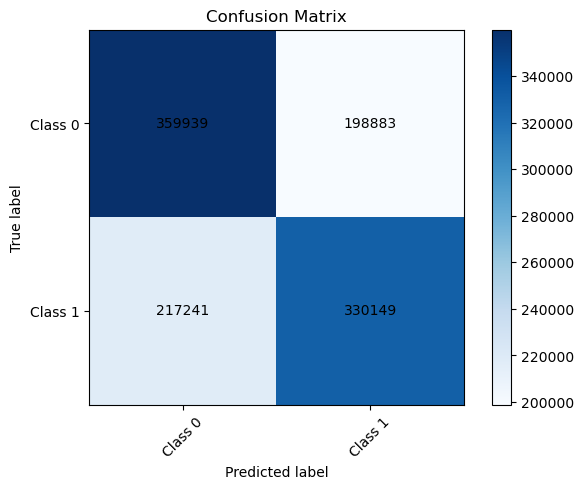

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, ["Class {}".format(i) for i in range(len(np.unique(y_test)))], rotation=45)
plt.yticks(tick_marks, ["Class {}".format(i) for i in range(len(np.unique(y_test)))])
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")

# Add labels to the plot
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                     horizontalalignment='center',
                     verticalalignment='center')

plt.show()

## Gaussian

In [36]:
gnb = GaussianNB()

# Entraîner le modèle sur l'ensemble d'entraînement
gnb.fit(X_train, y_train)

# Prédire les valeurs de la cible sur l'ensemble de test
y_pred_gnb = gnb.predict(X_test)

# Évaluer les performances du modèle
precision_gnb = precision_score(y_test, y_pred_gnb, average='weighted')
recall_gnb = recall_score(y_test, y_pred_gnb, average='weighted')
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print('Precision:', precision_gnb)
print('Recall:', recall_gnb)
print('F1-Score:', f1_gnb)
print('Accuracy:', accuracy_gnb)


Precision: 0.5298771779450945
Recall: 0.5109888520464432
F1-Score: 0.3904893592280493
Accuracy: 0.5109888520464432


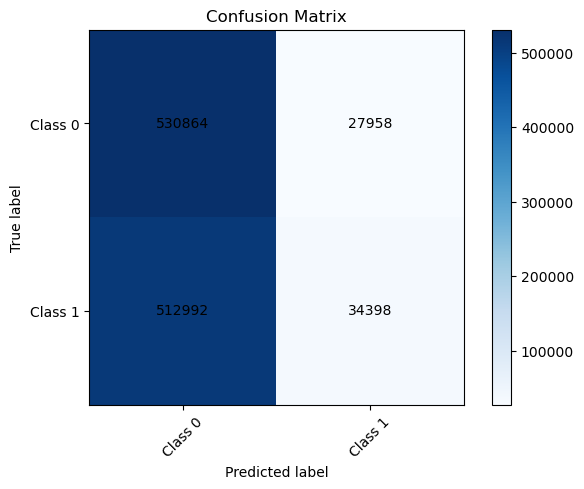

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gnb)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, ["Class {}".format(i) for i in range(len(np.unique(y_test)))], rotation=45)
plt.yticks(tick_marks, ["Class {}".format(i) for i in range(len(np.unique(y_test)))])
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")

# Add labels to the plot
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                     horizontalalignment='center',
                     verticalalignment='center')

plt.show()

## Logistic Regression

In [40]:
logreg = LogisticRegression(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
logreg.fit(X_train, y_train)

# Prédire les valeurs de la cible sur l'ensemble de test
y_pred_logreg = logreg.predict(X_test)

# Évaluer les performances du modèle
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print('Precision:', precision_logreg)
print('Recall:', recall_logreg)
print('F1-Score:', f1_logreg)
print('Accuracy:', accuracy_logreg)


Precision: 0.5350002620928909
Recall: 0.5083049180446424
F1-Score: 0.36385433156083447
Accuracy: 0.5083049180446424


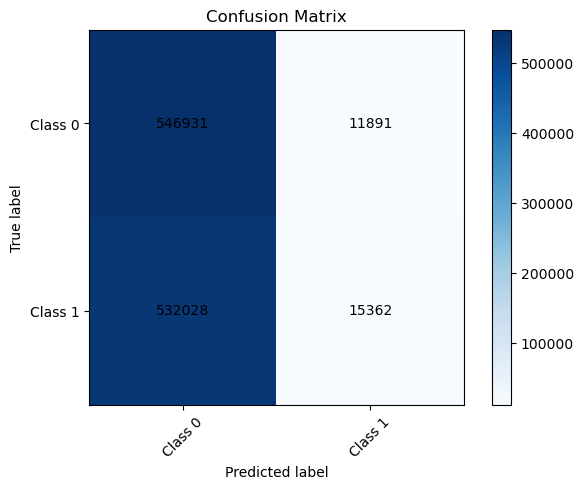

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_logreg)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, ["Class {}".format(i) for i in range(len(np.unique(y_test)))], rotation=45)
plt.yticks(tick_marks, ["Class {}".format(i) for i in range(len(np.unique(y_test)))])
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")

# Add labels to the plot
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                     horizontalalignment='center',
                     verticalalignment='center')

plt.show()

## Catboost : Pseudo Deep Learning Model

In [45]:
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=2, random_seed=42, verbose = True)

# Entraîner le modèle sur l'ensemble d'entraînement
catboost_model.fit(X_train, y_train)

# Prédire les valeurs de la cible sur l'ensemble de test
y_pred_catboost_model = catboost_model.predict(X_test)

# Évaluer les performances du modèle
precision_catboost_model = precision_score(y_test, y_pred_catboost_model, average='weighted')
recall_catboost_model = recall_score(y_test, y_pred_catboost_model, average='weighted')
f1_catboost_model = f1_score(y_test, y_pred_catboost_model, average='weighted')
accuracy_catboost_model = accuracy_score(y_test, y_pred_catboost_model)

print('Precision:', precision_catboost_model)
print('Recall:', recall_catboost_model)
print('F1-Score:', f1_catboost_model)
print('Accuracy:', accuracy_catboost_model)


0:	learn: 0.6929487	total: 247ms	remaining: 24.5s
1:	learn: 0.6927513	total: 347ms	remaining: 17s
2:	learn: 0.6924296	total: 457ms	remaining: 14.8s
3:	learn: 0.6926159	total: 552ms	remaining: 13.2s
4:	learn: 0.6924624	total: 648ms	remaining: 12.3s
5:	learn: 0.6923401	total: 749ms	remaining: 11.7s
6:	learn: 0.6922039	total: 854ms	remaining: 11.4s
7:	learn: 0.6921700	total: 956ms	remaining: 11s
8:	learn: 0.6920397	total: 1.05s	remaining: 10.7s
9:	learn: 0.6919250	total: 1.15s	remaining: 10.4s
10:	learn: 0.6919356	total: 1.25s	remaining: 10.1s
11:	learn: 0.6917970	total: 1.36s	remaining: 9.95s
12:	learn: 0.6917614	total: 1.46s	remaining: 9.76s
13:	learn: 0.6916946	total: 1.55s	remaining: 9.55s
14:	learn: 0.6916170	total: 1.66s	remaining: 9.43s
15:	learn: 0.6915110	total: 1.76s	remaining: 9.25s
16:	learn: 0.6915040	total: 1.86s	remaining: 9.08s
17:	learn: 0.6914322	total: 1.96s	remaining: 8.95s
18:	learn: 0.6913472	total: 2.06s	remaining: 8.77s
19:	learn: 0.6912930	total: 2.15s	remaining: 

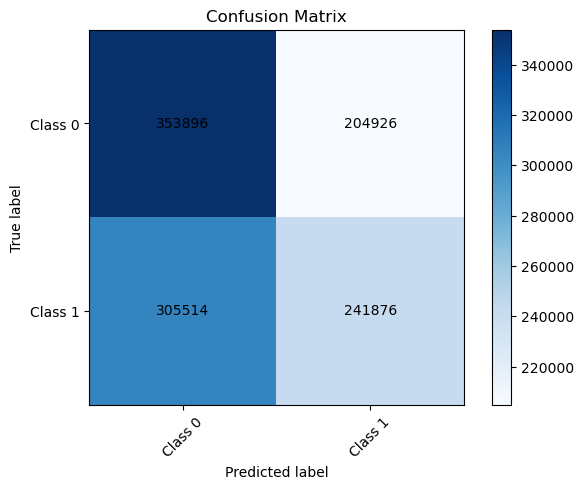

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_catboost_model)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, ["Class {}".format(i) for i in range(len(np.unique(y_test)))], rotation=45)
plt.yticks(tick_marks, ["Class {}".format(i) for i in range(len(np.unique(y_test)))])
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")

# Add labels to the plot
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                     horizontalalignment='center',
                     verticalalignment='center')

plt.show()

## Evaluation

### Curve de Roc

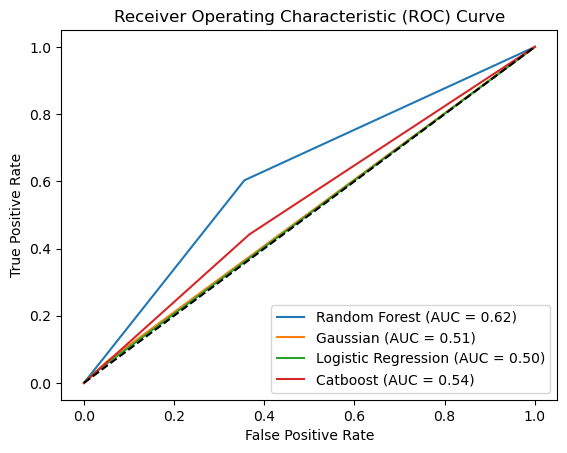

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

pred = [y_pred_rf,y_pred_gnb,y_pred_logreg,y_pred_catboost_model]
name = ['Random Forest', 'Gaussian','Logistic Regression','Catboost']
for p in range(len(pred)) :
    fpr, tpr, thresholds = roc_curve(y_test, pred[p])
    auc_score = roc_auc_score(y_test, pred[p])

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name[p], auc_score))

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()